# <font color='Blue'>Clustering DBSCAN</font>

## <font color='Blue'>Steps in DBSCAN</font>

    1) Pick a random point to start the process
    2) Look within epsilon distance of the point to find other (minimum) number of points.
    3) If no such points are found go back to (1)
    4) When another point is found within epsilon distance, designate this as a point in cluster and repeat (2-4)
    5) Stop when each point has been visited

## <font color='Blue'>Loading Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## <font color='Blue'>1.0 Clustering - Example 1</font>

In [2]:
spiral = pd.read_csv( "spirals.csv" )
spiral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   attitude  804 non-null    float64
 1   value     804 non-null    float64
 2   segment   804 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 19.0 KB


## <font color='Blue'>2.0 Visualizing Data</font>

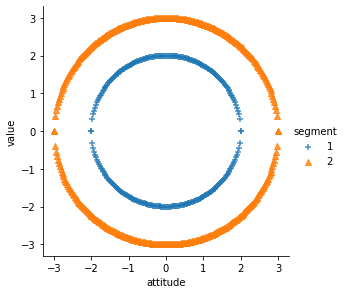

In [3]:
markers = ['+','^']
sn.lmplot( "attitude", "value",data=spiral,hue = "segment",fit_reg=False,markers = markers,size = 4 );

## <font color='Blue'>3.0 Data Preparation</font>
### <font color='Blue'>3.1 Subsetting attitudes and values from spiral dataframe</font>

In [4]:
df = spiral[['attitude','value']]
df.head(5)

,attitude,value
0,-2.000,0.000000
1,-1.975,0.315238
2,-1.950,0.444410
3,-1.925,0.542563
4,-1.900,0.624500


### <font color='Blue'>3.2 Normalizing Data</font>

In [5]:
#Normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[["attitude", "value"]] )
print(type(X))
X[0:5]

<class 'numpy.ndarray'>


array([[-1.30350107e+00,  1.64050906e-17],
       [-1.28720731e+00,  1.46292836e-01],
       [-1.27091355e+00,  2.06237691e-01],
       [-1.25461978e+00,  2.51787954e-01],
       [-1.23832602e+00,  2.89812285e-01]])

### <font color='Blue'>3.3 Executing DBSCAN</font>

In [8]:
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = db.labels_

In [9]:
# Clusters and Noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0


### <font color='Blue'>3.4 Validation</font>

### <font color='Blue'>3.4.1 Validation - Silhoutee Coefficient</font>

In [33]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.018


### <font color='Blue'>3.4.2 Validation - Calinski-Harabasz index</font>

In [34]:
# Higher the better
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(X, labels))

Calinski-Harabasz index: 0.000


### <font color='Blue'>3.5 Assigning Cluser Labels</font>

In [10]:
spiral["clusterid"] = labels
cluster_size = spiral.groupby(['clusterid']).size() 
print(cluster_size)
#Note: -1 indicates noise

clusterid
0    322
1    482
dtype: int64


### <font color='Blue'>3.6 Plotting Clusters</font>

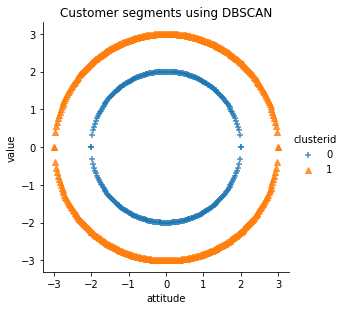

In [11]:
# Plotting the cluster
markers = ['+','^']
sn.lmplot( "attitude", "value",data=spiral,hue = "clusterid",markers=markers,fit_reg=False,size = 4 );
plt.title( "Customer segments using DBSCAN");

### <font color='Blue'>4.0 What happens when we use KMeans in this case ?</font>

In [37]:
kclusters = KMeans(2)
kclusters.fit(X)

KMeans(n_clusters=2)

### <font color='Blue'>4.1 Validation</font>

### <font color='Blue'>4.1.1 Validation - Silhoutee Coefficient</font>

In [38]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, kclusters.labels_))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.454


### <font color='Blue'>4.1.2 Validation - Calinski-Harabasz index</font>

In [39]:
# Higher the better
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(X, kclusters.labels_))

Calinski-Harabasz index: 641.423


### <font color='Blue'>4.2 Assign Cluster Labels</font>

In [40]:
spiral["kclusterid"] = kclusters.labels_
spiral[0:5]
kclusters_size = spiral.groupby(['kclusterid']).size() 
print(kclusters_size)

kclusterid
0    402
1    402
dtype: int64


### <font color='Blue'>4.3 Plotting the Clusters</font>

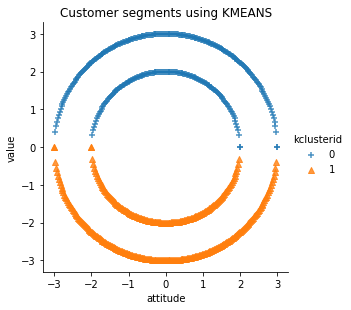

In [41]:
markers = ['+','^']
sn.lmplot( "attitude", "value",data=spiral,hue = "kclusterid",markers=markers,fit_reg=False,size = 4 );
plt.title( "Customer segments using KMEANS");

### <font color='Blue'>4.4 Takeaways</font>

    Compare the cluster plots of KMEANS and DBSCAN with Segment Data
    It is clear that DBSCAN works well in connected points such as this case
    Silhoutte Index / CH Index need not always be a good indicator of performance